# **Field Research**
-------

## **Experimental Design** 

<img src = "Sketch_5.jpg" width="350" height="250">

Latin square experimental design depicting instrumentation and treatment layout. Plot sizes are 8m x 8m. Various irrigation treatments including a traditional frequency-based irrigation, <br> a deficit irrigation based on reference ET (ETo), irrigation based on SMS information, and a check treatment of zero irrigation (i.e., precipitation only). 

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#get working directory 
print(glob.os.getcwd())

#import SMS data and create dataframe (datalogger 24157 & 24158)
df_sms_1 = pd.read_csv(r"..\Data\24157__datalogger_data\DL_24157\24157_SMS_Table1_USGA_Research_2019_06_17_10_40_46.dat", skiprows=lambda x: x in [0,2,3])
df_sms_2 = pd.read_csv(r"..\Data\24158_datalogger_data\DL_24158\24158_SMS_Table1_USGA_Reasearch_2019_06_17_10_37_39.dat", skiprows=lambda x: x in [0,2,3])

#import IRT data and create dataframe (datalogger 24157 & 24158)
df_irt_1 = pd.read_csv(r"..\Data\24157__datalogger_data\DL_24157\24157_IRT_Table1_USGA_Research_2019_06_17_10_40_46.dat", skiprows=lambda x: x in [0,2,3])
df_irt_2 = pd.read_csv(r"..\Data\24158_datalogger_data\DL_24158\24158_IRT_Table1_USGA_Research_2019_06_17_10_37_39.dat", skiprows=lambda x: x in [0,2,3])

#import NDVI data and create dataframe (datalogger 24157 & 24158)
df_ndvi_1 = pd.read_csv(r"..\Data\24157__datalogger_data\DL_24157\24157_NDVITable1_USGA_Research_2019_06_17_10_40_46.dat", skiprows=lambda x: x in [0,2,3])
df_ndvi_2 = pd.read_csv(r"..\Data\24158_datalogger_data\DL_24158\24158_NDVITable1_USGA_Research_2019_06_17_10_37_39.dat", skiprows=lambda x: x in [0,2,3])


C:\Users\Dyer\Dropbox\Wes Dyer\USGA_zoysia_research\python_code


In [3]:
# specify date range 
subset_dates = pd.date_range(start ="2019-06-01 00:00:00", end = "2019-10-01 00:00:00", freq = 'h')

#convert dates from index to datetime column
#sms
df_sms_1["TIMESTAMP"] = pd.to_datetime(df_sms_1["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")
df_sms_2["TIMESTAMP"] = pd.to_datetime(df_sms_2["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")
#irt
df_irt_1["TIMESTAMP"] = pd.to_datetime(df_irt_1["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")
df_irt_2["TIMESTAMP"] = pd.to_datetime(df_irt_2["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")
#ndvi
df_ndvi_1["TIMESTAMP"] = pd.to_datetime(df_irt_1["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")
df_ndvi_2["TIMESTAMP"] = pd.to_datetime(df_irt_2["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")

# find matching dates
#sms
idx_sms_1 = df_sms_1["TIMESTAMP"].isin(subset_dates)
idx_sms_2 = df_sms_2["TIMESTAMP"].isin(subset_dates)
#irt
idx_irt_1 = df_irt_1["TIMESTAMP"].isin(subset_dates)
idx_irt_2 = df_irt_2["TIMESTAMP"].isin(subset_dates)
#ndvi
idx_ndvi_1 = df_ndvi_1["TIMESTAMP"].isin(subset_dates)
idx_ndvi_2 = df_ndvi_2["TIMESTAMP"].isin(subset_dates)

#New data frame for datalogger 24157 (west) & 24158 (east)
#sms
sms_subset_1 = df_sms_1.loc[idx_sms_1,:]
sms_subset_2 = df_sms_2.loc[idx_sms_2,:]
#irt
irt_subset_1 = df_irt_1.loc[idx_irt_1,:]
irt_subset_2 = df_irt_2.loc[idx_irt_2,:]
#ndvi
ndvi_subset_1 = df_ndvi_1.loc[idx_ndvi_1,:]
ndvi_subset_2 = df_ndvi_2.loc[idx_ndvi_2,:]

In [4]:
print(type(df_sms_1.TIMESTAMP[0]))
df_sms_1.head()
#data.timestamp = pd.to_datetime(data.timestamp, format='%d-%m-%Y %H:%M')
#print(type(data.timestamp[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,TIMESTAMP,RECORD,BattV_Avg,PTemp_C_Avg,VWC_A_Avg,EC_A_Avg,T_A_Avg,P_A_Avg,PA_A_Avg,VR_A_Avg,...,T_G_Avg,P_G_Avg,PA_G_Avg,VR_G_Avg,VWC_H_Avg,EC_H_Avg,T_H_Avg,P_H_Avg,PA_H_Avg,VR_H_Avg
0,2018-09-01 00:00:00,5,10.53,28.43,0.351,0.456,26.09,20.43,1.777,1.567,...,26.35,19.55,1.740,1.567,0.332,0.262,26.17,18.98,1.715,1.326
1,2018-09-01 01:00:00,6,10.53,28.19,0.350,0.453,25.92,20.39,1.776,1.564,...,26.16,19.52,1.739,1.568,0.332,0.262,26.01,18.95,1.714,1.325
2,2018-09-01 02:00:00,7,10.52,27.77,0.350,0.452,25.76,20.35,1.775,1.562,...,25.99,19.50,1.738,1.565,0.332,0.259,25.84,18.92,1.713,1.322
3,2018-09-01 03:00:00,8,10.52,27.47,0.349,0.450,25.61,20.33,1.774,1.559,...,25.84,19.51,1.738,1.562,0.331,0.259,25.73,18.89,1.712,1.321
4,2018-09-01 04:00:00,9,10.51,26.75,0.349,0.448,25.49,20.30,1.773,1.558,...,25.70,19.48,1.738,1.561,0.331,0.259,25.60,18.89,1.712,1.321


# **Soil Moisture Data**
___

C:\Users\Dyer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


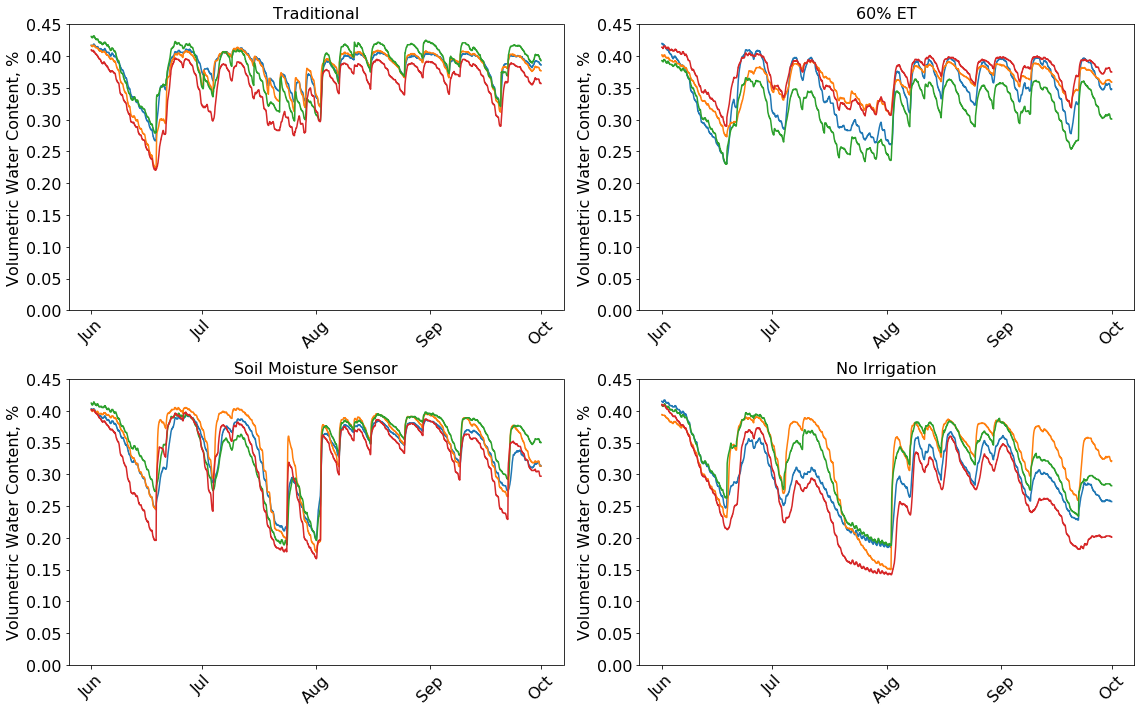

In [38]:
plt.figure(figsize=(16,10))

# Plot observation "Traditional"
plt.subplot(2,2,1)
plt.title('Traditional', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_C_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_H_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_J_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_M_Avg"])
plt.ylabel('Volumetric Water Content, %', size=16)
plt.ylim(0,0.45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()

plt.subplot(2,2,2)
plt.title('60% ET', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_D_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_G_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_I_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_N_Avg"])
plt.ylabel('Volumetric Water Content, %', size=16)
plt.ylim(0,0.45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('Soil Moisture Sensor', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_B_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_E_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_K_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_P_Avg"])
plt.ylabel('Volumetric Water Content, %', size=16)
plt.ylim(0,0.45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('No Irrigation', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_A_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["VWC_F_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_L_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["VWC_O_Avg"])
plt.ylabel('Volumetric Water Content, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,0.45)
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

 
plt.show()

#link to changing date frequency https://stackoverflow.com/questions/35465409/using-datetime-as-ticks-in-matplotlib

In [49]:
#dataframe for green canopy cover
toro_sms = pd.read_excel(r'C:\Users\Dyer\Dropbox\Wes Dyer\USGA_zoysia_research\Data\Toro_tab_data\Plot_A.xlsx')

# convert to_datetime
toro_sms["date"] = pd.to_datetime(toro_sms["date"], format="%m-%d-%Y %H:%M")
toro_sms.head()

,zone,node_id,description,moisture,tempature,salinity,date,Depth
0,USGA Trial,Plot A,22237,38.46,63.70,0.72,2018-10-01 08:00:00,0
1,USGA Trial,Plot A,22237,31.13,65.07,1.09,2018-10-01 08:00:00,1
2,USGA Trial,Plot A,22237,38.43,63.82,0.72,2018-10-01 09:00:00,0
3,USGA Trial,Plot A,22237,31.30,65.07,1.06,2018-10-01 09:00:00,1
4,USGA Trial,Plot A,22237,38.47,64.32,0.73,2018-10-01 10:00:00,0


In [126]:
#for i in toro_sms.index:
   # if toro_sms['Depth'][i] == 0:
         #(toro_sms['Depth'][i],toro_sms['moisture'][i],toro_sms['date'][i])
                

# **Soil Temperature Data**
___

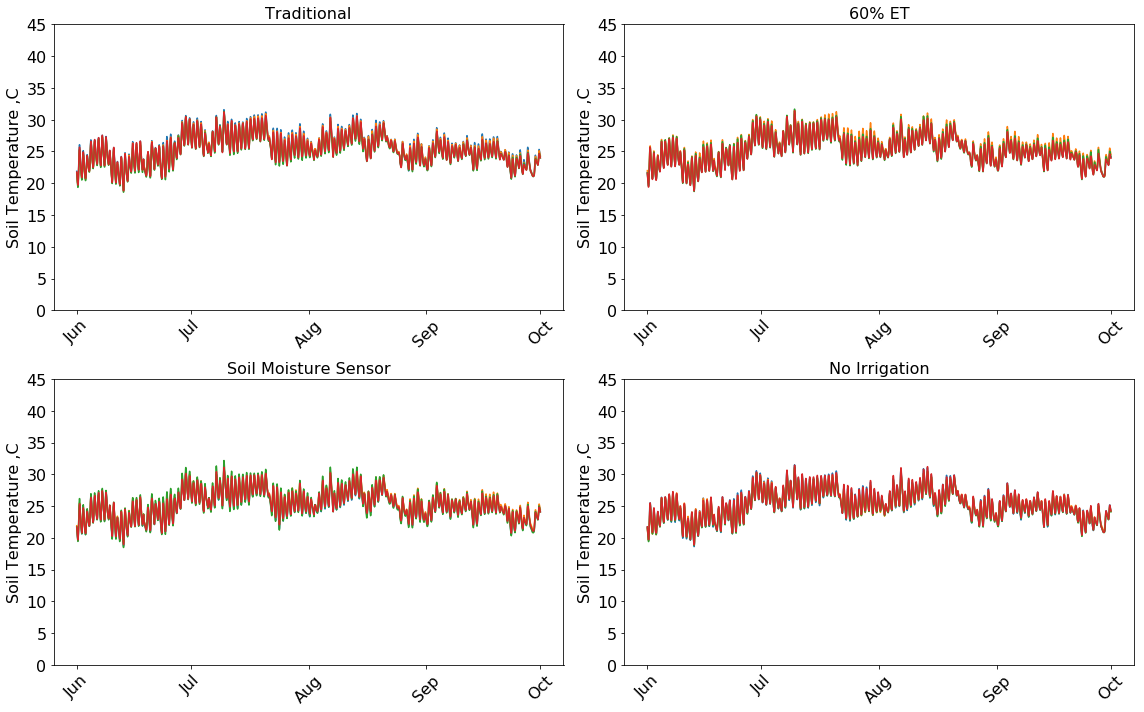

In [6]:
plt.figure(figsize=(16,10))

# Plot observation "Traditional"
plt.subplot(2,2,1)
plt.title('Traditional', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_C_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_H_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_J_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_M_Avg"])
plt.ylabel('Soil Temperature ,C', size=16)
plt.ylim(0,45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()

plt.subplot(2,2,2)
plt.title('60% ET', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_D_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_G_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_I_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_N_Avg"])
plt.ylabel('Soil Temperature ,C', size=16)
plt.ylim(0,45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('Soil Moisture Sensor', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_B_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_E_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_K_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_P_Avg"])
plt.ylabel('Soil Temperature ,C', size=16)
plt.ylim(0,45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('No Irrigation', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_A_Avg"])
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_F_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_L_Avg"])
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_O_Avg"])
plt.ylabel('Soil Temperature ,C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,45)
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.show()

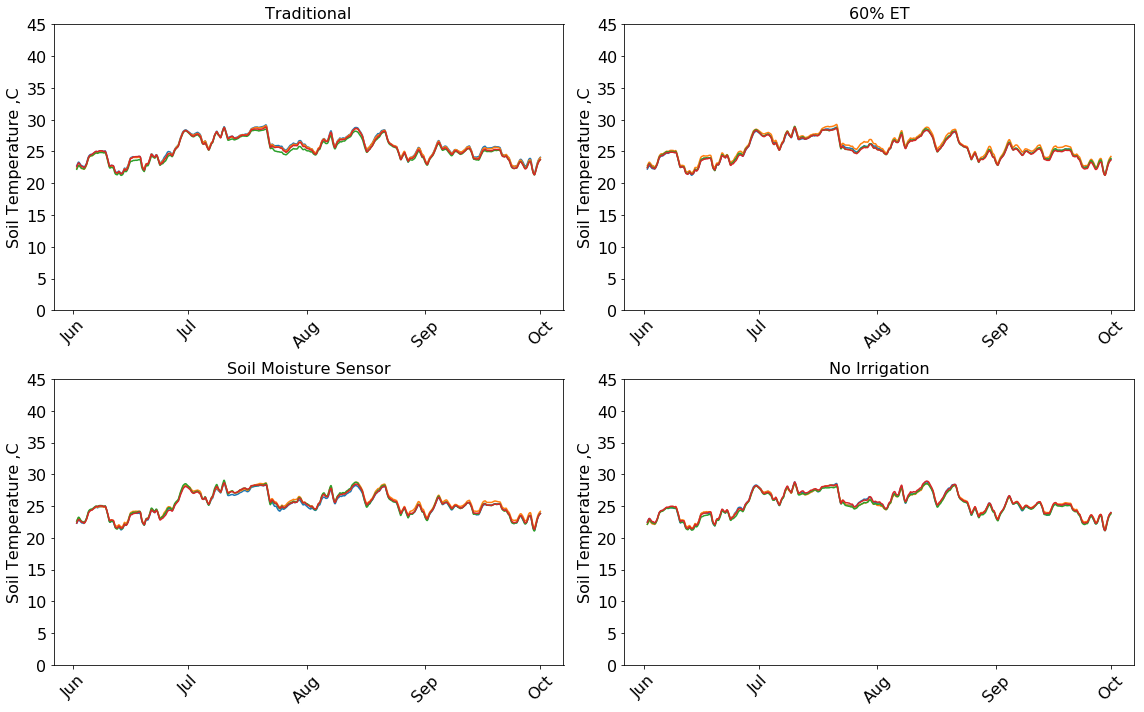

In [7]:
#moving average window 24 of values
plt.figure(figsize=(16,10))

# Plot observation "Traditional"
plt.subplot(2,2,1)
plt.title('Traditional', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_C_Avg"].rolling(24).mean())
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_H_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_J_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_M_Avg"].rolling(24).mean())
plt.ylabel('Soil Temperature ,C', size=16)
plt.ylim(0,45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()

plt.subplot(2,2,2)
plt.title('60% ET', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_D_Avg"].rolling(24).mean())
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_G_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_I_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_N_Avg"].rolling(24).mean())
plt.ylabel('Soil Temperature ,C', size=16)
plt.ylim(0,45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('Soil Moisture Sensor', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_B_Avg"].rolling(24).mean())
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_E_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_K_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_P_Avg"].rolling(24).mean())
plt.ylabel('Soil Temperature ,C', size=16)
plt.ylim(0,45)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('No Irrigation', size=16)
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_A_Avg"].rolling(24).mean())
plt.plot(sms_subset_1["TIMESTAMP"], sms_subset_1["T_F_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_L_Avg"].rolling(24).mean())
plt.plot(sms_subset_2["TIMESTAMP"], sms_subset_2["T_O_Avg"].rolling(24).mean())
plt.ylabel('Soil Temperature ,C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,45)
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.show()

# **Infrared Thermometer Data**
___

In [8]:
#rename index to corresponding plot i.d. 
#subset_1
irt_1 = irt_subset_1.rename(columns={'TT_C_1_Avg': 'IRT_C_Avg', 'TT_C_2_Avg': 'IRT_F_Avg', 'TT_C_3_Avg': 'IRT_D_Avg', 'TT_C_4_Avg': "IRT_E_Avg"})
#irt_subset_1['IRT_C_Avg'] = irt_subset_1['TT_C_1_Avg']
#irt_subset_1['IRT_F_Avg'] = irt_subset_1['TT_C_2_Avg']
#irt_subset_1['IRT_D_Avg'] = irt_subset_1['TT_C_3_Avg']
#irt_subset_1['IRT_E_Avg'] = irt_subset_1['TT_C_4_Avg']

irt_2 = irt_subset_2.rename(columns={'TT_C_1_Avg': 'IRT_K_Avg', 'TT_C_2_Avg': 'IRT_N_Avg', 'TT_C_3_Avg': 'IRT_L_Avg', 'TT_C_4_Avg': "IRT_M_Avg"})
#irt_subset_2['IRT_K_Avg'] = irt_subset_2['TT_C_1_Avg']
#irt_subset_2['IRT_N_Avg'] = irt_subset_2['TT_C_2_Avg']
#irt_subset_2['IRT_L_Avg'] = irt_subset_2['TT_C_3_Avg']
#irt_subset_2['IRT_M_Avg'] = irt_subset_2['TT_C_4_Avg']
#irt_subset_2.head()

In [9]:
#calculating the moving average, 24 value window
irt_1['mov_avg_C'] = irt_1['IRT_C_Avg'].rolling(24).mean()
irt_1['mov_avg_F'] = irt_1['IRT_F_Avg'].rolling(24).mean()
irt_1['mov_avg_D'] = irt_1['IRT_D_Avg'].rolling(24).mean()
irt_1['mov_avg_E'] = irt_1['IRT_E_Avg'].rolling(24).mean()

irt_2['mov_avg_K'] = irt_2['IRT_K_Avg'].rolling(24).mean()
irt_2['mov_avg_N'] = irt_2['IRT_N_Avg'].rolling(24).mean()
irt_2['mov_avg_L'] = irt_2['IRT_L_Avg'].rolling(24).mean()
irt_2['mov_avg_M'] = irt_2['IRT_M_Avg'].rolling(24).mean()

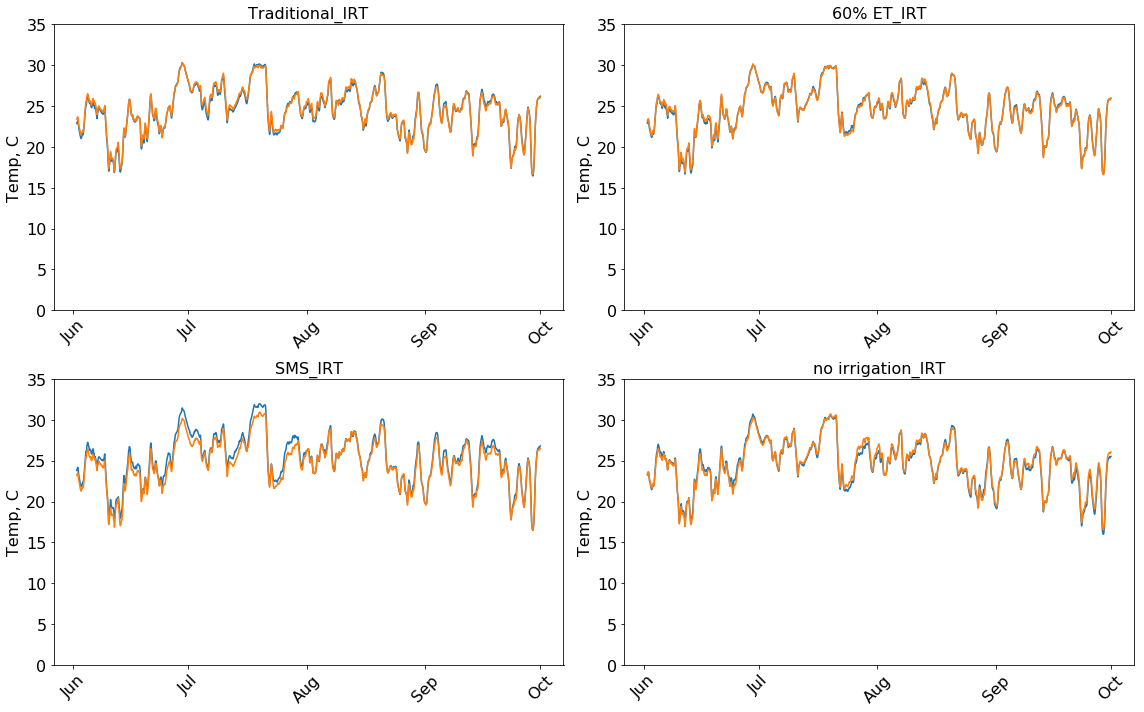

In [10]:
#moving average IRT

plt.figure(figsize=(16,10))

# Plot observation "Traditional treatment"
plt.subplot(2,2,1)
plt.title('Traditional_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["mov_avg_C"])
plt.plot(irt_2["TIMESTAMP"], irt_2["mov_avg_M"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "60% ET treatment"
plt.subplot(2,2,2)
plt.title('60% ET_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["mov_avg_D"])
plt.plot(irt_2["TIMESTAMP"], irt_2["mov_avg_N"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "SMS treatment"
plt.subplot(2,2,3)
plt.title('SMS_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["mov_avg_E"])
plt.plot(irt_2["TIMESTAMP"], irt_2["mov_avg_K"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "no irrigation treatment"
plt.subplot(2,2,4)
plt.title('no irrigation_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["mov_avg_F"])
plt.plot(irt_2["TIMESTAMP"], irt_2["mov_avg_L"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35)
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.show()

In [11]:
#index TIMESTAMP for both dataframes
idx_date_irt_1 = irt_subset_1.set_index('TIMESTAMP')
idx_date_irt_2 = irt_subset_2.set_index('TIMESTAMP')

#new dataframe 10:00:00 to 16:00:00 
#dataframe 1 
irt_1_avg = idx_date_irt_1.between_time('10:00:00', '16:00:00').resample('1D').mean()
irt_1_avg = irt_1_avg.reset_index(0)
#dataframe 2
irt_2_avg = idx_date_irt_2.between_time('10:00:00', '16:00:00').resample('1D').mean()
irt_2_avg = irt_2_avg.reset_index(0)

irt_1_avg = irt_1_avg.rename(columns={'TT_C_1_Avg': 'IRT_C_Avg', 'TT_C_2_Avg': 'IRT_F_Avg', 'TT_C_3_Avg': 'IRT_D_Avg', 'TT_C_4_Avg': "IRT_E_Avg"})
irt_2_avg = irt_2_avg.rename(columns={'TT_C_1_Avg': 'IRT_K_Avg', 'TT_C_2_Avg': 'IRT_N_Avg', 'TT_C_3_Avg': 'IRT_L_Avg', 'TT_C_4_Avg': "IRT_M_Avg"})

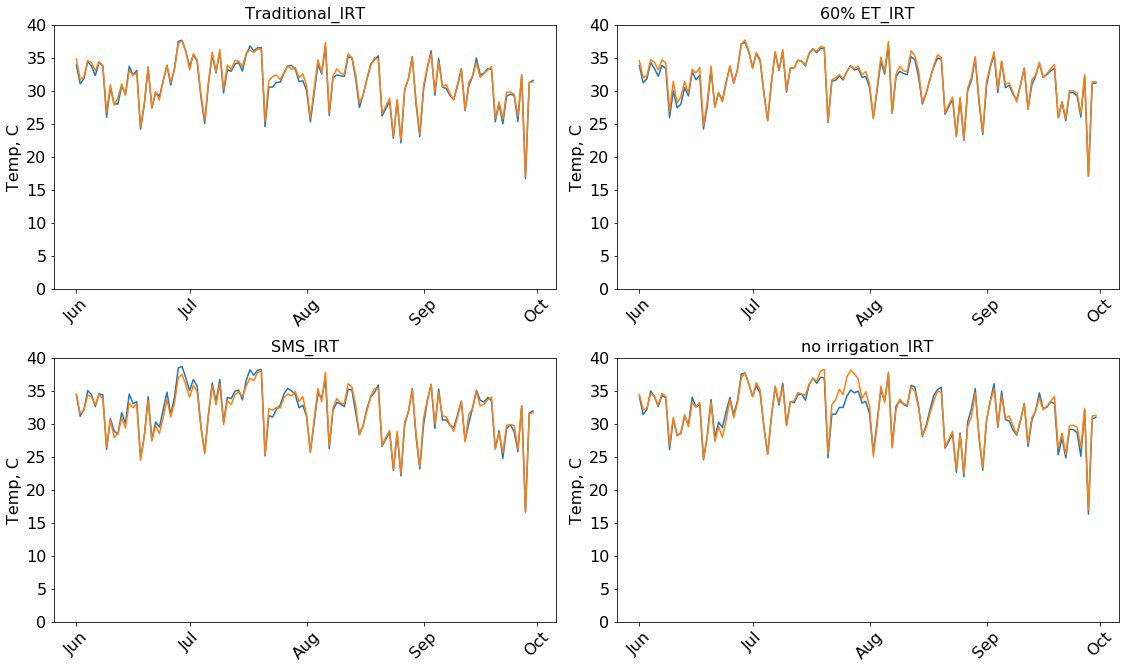

In [12]:
#between times 10:00-16:00
plt.figure(figsize=(16,10))

# Plot observation "Traditional treatment"
plt.subplot(2,2,1)
plt.title('Traditional_IRT', size=16)
plt.plot(irt_1_avg["TIMESTAMP"], irt_1_avg["IRT_C_Avg"])
plt.plot(irt_2_avg["TIMESTAMP"], irt_2_avg["IRT_M_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "60% ET treatment"
plt.subplot(2,2,2)
plt.title('60% ET_IRT', size=16)
plt.plot(irt_1_avg["TIMESTAMP"], irt_1_avg["IRT_D_Avg"])
plt.plot(irt_2_avg["TIMESTAMP"], irt_2_avg["IRT_N_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "SMS treatment"
plt.subplot(2,2,3)
plt.title('SMS_IRT', size=16)
plt.plot(irt_1_avg["TIMESTAMP"], irt_1_avg["IRT_E_Avg"])
plt.plot(irt_2_avg["TIMESTAMP"], irt_2_avg["IRT_K_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "no irrigation treatment"
plt.subplot(2,2,4)
plt.title('no irrigation_IRT', size=16)
plt.plot(irt_1_avg["TIMESTAMP"], irt_1_avg["IRT_F_Avg"])
plt.plot(irt_2_avg["TIMESTAMP"], irt_2_avg["IRT_L_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,40)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

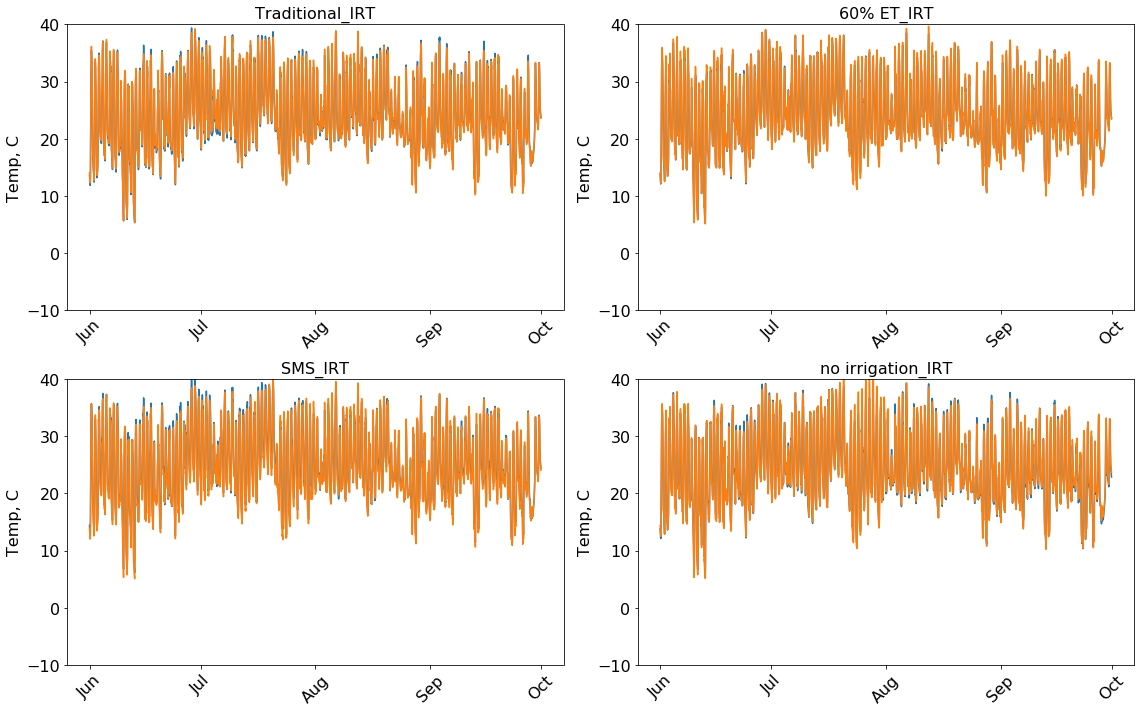

In [13]:
# hourly frequency 
plt.figure(figsize=(16,10))

# Plot observation "Traditional treatment"
plt.subplot(2,2,1)
plt.title('Traditional_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["IRT_C_Avg"])
plt.plot(irt_2["TIMESTAMP"], irt_2["IRT_M_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-10,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "60% ET treatment"
plt.subplot(2,2,2)
plt.title('60% ET_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["IRT_D_Avg"])
plt.plot(irt_2["TIMESTAMP"], irt_2["IRT_N_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-10,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "SMS treatment"
plt.subplot(2,2,3)
plt.title('SMS_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["IRT_E_Avg"])
plt.plot(irt_2["TIMESTAMP"], irt_2["IRT_K_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-10,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "no irrigation treatment"
plt.subplot(2,2,4)
plt.title('no irrigation_IRT', size=16)
plt.plot(irt_1["TIMESTAMP"], irt_1["IRT_F_Avg"])
plt.plot(irt_2["TIMESTAMP"], irt_2["IRT_L_Avg"])
plt.ylabel('Temp, C', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-10,40)
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()


plt.show()

# **Normalized Difference Vegetation Index Data**
___

In [14]:
#rename index to corresponding plot i.d. 
#subset_1
#ndvi_1 = ndvi_subset_1.rename(columns={'NDVI_1_Avg': 'NDVI_C_Avg', 'NDVI_2_Avg': 'NDVI_D_Avg', 'NDVI_3_Avg': 'NDVI_E_Avg', 'NDVI_4_Avg': 'NDVI_F_Avg'})
#ndvi_subset_1['NDVI_C_Avg'] = ndvi_subset_1['NDVI_1_Avg']
#ndvi_subset_1['NDVI_D_Avg'] = ndvi_subset_1['NDVI_2_Avg']
#ndvi_subset_1['NDVI_E_Avg'] = ndvi_subset_1['NDVI_3_Avg']
#ndvi_subset_1['NDVI_F_Avg'] = ndvi_subset_1['NDVI_4_Avg']

$ NDVI = \frac{\rho NIR - \rho  red}{\rho  NIR + \rho  red} $

ρred and ρNIR are percent reﬂectances in the red and near infrared (NIR)

In [39]:

#calculate NDVI using formula to check output
ndvi_subset_1['NDVI_1_Avg'] = (ndvi_subset_1['DownNIR_1_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_1['DownRed_1_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_1['DownNIR_1_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_1['DownRed_1_Avg'] / ndvi_subset_1['UpRed_Avg'])
ndvi_subset_1['NDVI_2_Avg'] = (ndvi_subset_1['DownNIR_2_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_1['DownRed_2_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_1['DownNIR_2_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_1['DownRed_2_Avg'] / ndvi_subset_1['UpRed_Avg'])
ndvi_subset_1['NDVI_3_Avg'] = (ndvi_subset_1['DownNIR_3_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_1['DownRed_3_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_1['DownNIR_3_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_1['DownRed_3_Avg'] / ndvi_subset_1['UpRed_Avg'])
ndvi_subset_1['NDVI_4_Avg'] = (ndvi_subset_1['DownNIR_4_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_1['DownRed_4_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_1['DownNIR_4_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_1['DownRed_4_Avg'] / ndvi_subset_1['UpRed_Avg'])

#rename column headers
ndvi_1 = ndvi_subset_1.rename(columns={'NDVI_1_Avg': 'NDVI_C_Avg', 'NDVI_2_Avg': 'NDVI_D_Avg', 'NDVI_3_Avg': 'NDVI_E_Avg', 'NDVI_4_Avg': 'NDVI_F_Avg'})


In [40]:
#upward facing sensor values are on subset_1 
#calculate NDVI using formula 
ndvi_subset_2['NDVI_1_Avg'] = (ndvi_subset_2['DownNIR_1_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_2['DownRed_1_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_2['DownNIR_1_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_2['DownRed_1_Avg'] / ndvi_subset_1['UpRed_Avg'])
ndvi_subset_2['NDVI_2_Avg'] = (ndvi_subset_2['DownNIR_2_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_2['DownRed_2_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_2['DownNIR_2_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_2['DownRed_2_Avg'] / ndvi_subset_1['UpRed_Avg'])
ndvi_subset_2['NDVI_3_Avg'] = (ndvi_subset_2['DownNIR_3_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_2['DownRed_3_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_2['DownNIR_3_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_2['DownRed_3_Avg'] / ndvi_subset_1['UpRed_Avg'])
ndvi_subset_2['NDVI_4_Avg'] = (ndvi_subset_2['DownNIR_4_Avg'] / ndvi_subset_1['UpNIR_Avg'] - ndvi_subset_2['DownRed_4_Avg'] / ndvi_subset_1['UpRed_Avg']) / (ndvi_subset_2['DownNIR_4_Avg'] / ndvi_subset_1['UpNIR_Avg'] + ndvi_subset_2['DownRed_4_Avg'] / ndvi_subset_1['UpRed_Avg'])

#rename column headers
ndvi_2 = ndvi_subset_2.rename(columns={'NDVI_1_Avg': 'NDVI_K_Avg', 'NDVI_2_Avg': 'NDVI_L_Avg', 'NDVI_3_Avg': 'NDVI_M_Avg', 'NDVI_4_Avg': 'NDVI_N_Avg'})

In [17]:
#index TIMESTAMP for both dataframes
idx_date_ndvi_1 = ndvi_1.set_index('TIMESTAMP')
idx_date_ndvi_2 = ndvi_2.set_index('TIMESTAMP')

#new dataframe 10:00:00 to 16:00:00 
#dataframe 1 
ndvi_1_avg = idx_date_ndvi_1.between_time('10:00:00', '16:00:00').resample('1D').mean()
ndvi_1_avg = ndvi_1_avg.reset_index(0)
#dataframe 2
ndvi_2_avg = idx_date_ndvi_2.between_time('10:00:00', '16:00:00').resample('1D').mean()
ndvi_2_avg = ndvi_2_avg.reset_index(0)

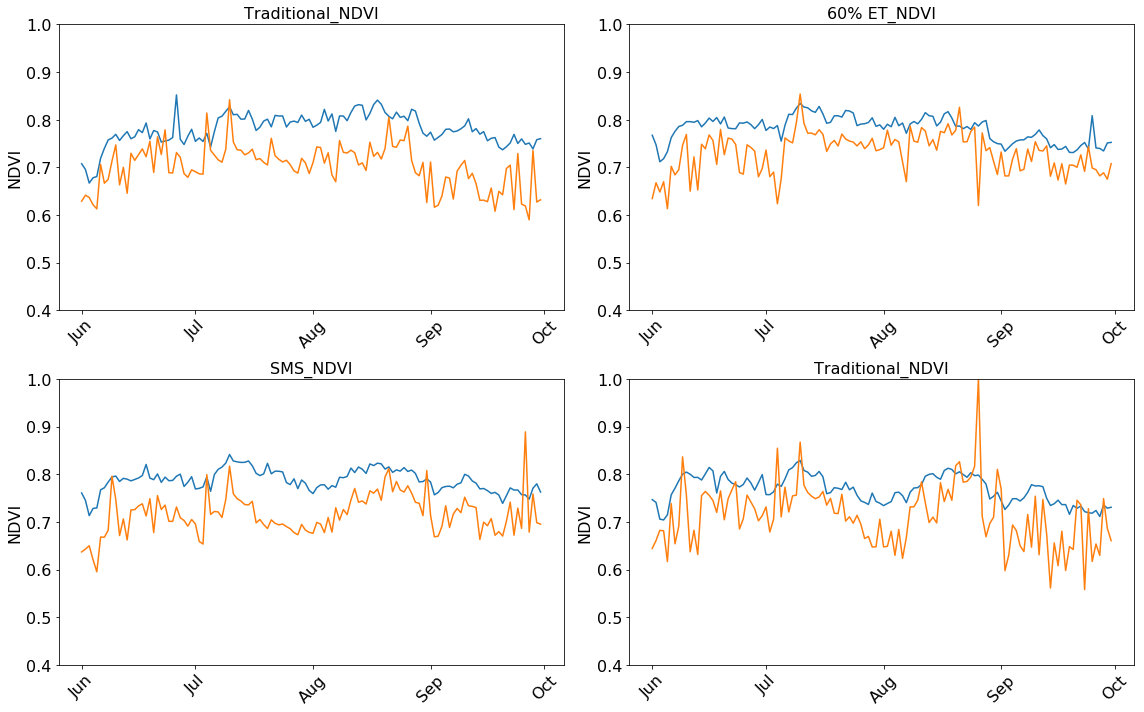

In [18]:
plt.figure(figsize=(16,10))

# Plot observation "Traditional treatment"
plt.subplot(2,2,1)
plt.title('Traditional_NDVI', size=16)
plt.plot(ndvi_1_avg["TIMESTAMP"], ndvi_1_avg["NDVI_C_Avg"])
plt.plot(ndvi_2_avg["TIMESTAMP"], ndvi_2_avg["NDVI_M_Avg"])
plt.ylabel('NDVI', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.4,1)
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "60% ET treatment"
plt.subplot(2,2,2)
plt.title('60% ET_NDVI', size=16)
plt.plot(ndvi_1_avg["TIMESTAMP"], ndvi_1_avg["NDVI_D_Avg"])
plt.plot(ndvi_2_avg["TIMESTAMP"], ndvi_2_avg["NDVI_N_Avg"])
plt.ylabel('NDVI', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.4,1)
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "SMS treatment"
plt.subplot(2,2,3)
plt.title('SMS_NDVI', size=16)
plt.plot(ndvi_1_avg["TIMESTAMP"], ndvi_1_avg["NDVI_E_Avg"])
plt.plot(ndvi_2_avg["TIMESTAMP"], ndvi_2_avg["NDVI_K_Avg"])
plt.ylabel('NDVI', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.ylim(0.4,1)
plt.yticks(fontsize=16)
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

# Plot observation "no irrigation treatment"
plt.subplot(2,2,4)
plt.title('Traditional_NDVI', size=16)
plt.plot(ndvi_1_avg["TIMESTAMP"], ndvi_1_avg["NDVI_F_Avg"])
plt.plot(ndvi_2_avg["TIMESTAMP"], ndvi_2_avg["NDVI_L_Avg"])
plt.ylabel('NDVI', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.4,1)
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

plt.show()

# **Green Canopy Cover Data**

___

In [8]:
#dataframe for green canopy cover
gcc = pd.read_excel(r'..\Data\GCC_data.xlsx')

# convert to_datetime
gcc["TIMESTAMP"] = pd.to_datetime(gcc["TIMESTAMP"], format="%Y-%m-%d %H:%M:%S")

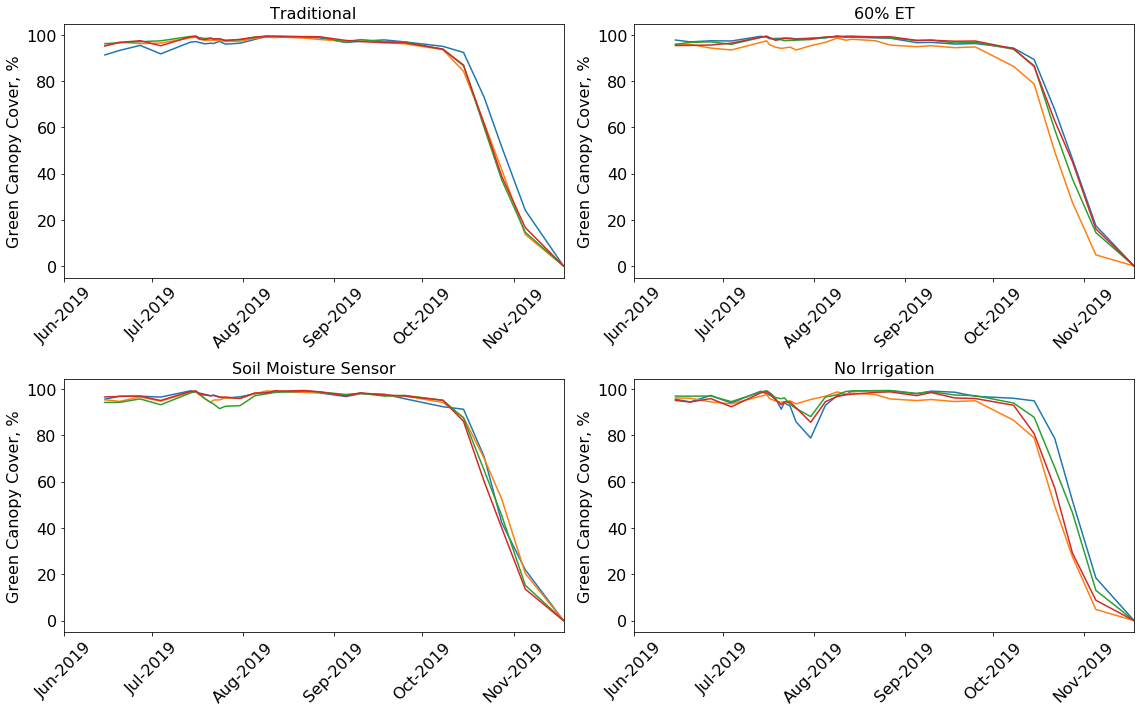

In [131]:
plt.figure(figsize=(16,10))

# Plot observation "Traditional"
plt.subplot(2,2,1)
plt.title('Traditional', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_c"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_h"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_j"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_m"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2019-06-01'), pd.Timestamp('2019-11-18'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.tight_layout()

plt.subplot(2,2,2)
plt.title('60% ET', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_d"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_g"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_i"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_n"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2019-06-01'), pd.Timestamp('2019-11-18'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('Soil Moisture Sensor', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_b"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_e"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_k"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_p"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2019-06-01'), pd.Timestamp('2019-11-18'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('No Irrigation', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_a"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_f"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_l"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_o"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2019-06-01'), pd.Timestamp('2019-11-18'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.tight_layout()

 
plt.show()

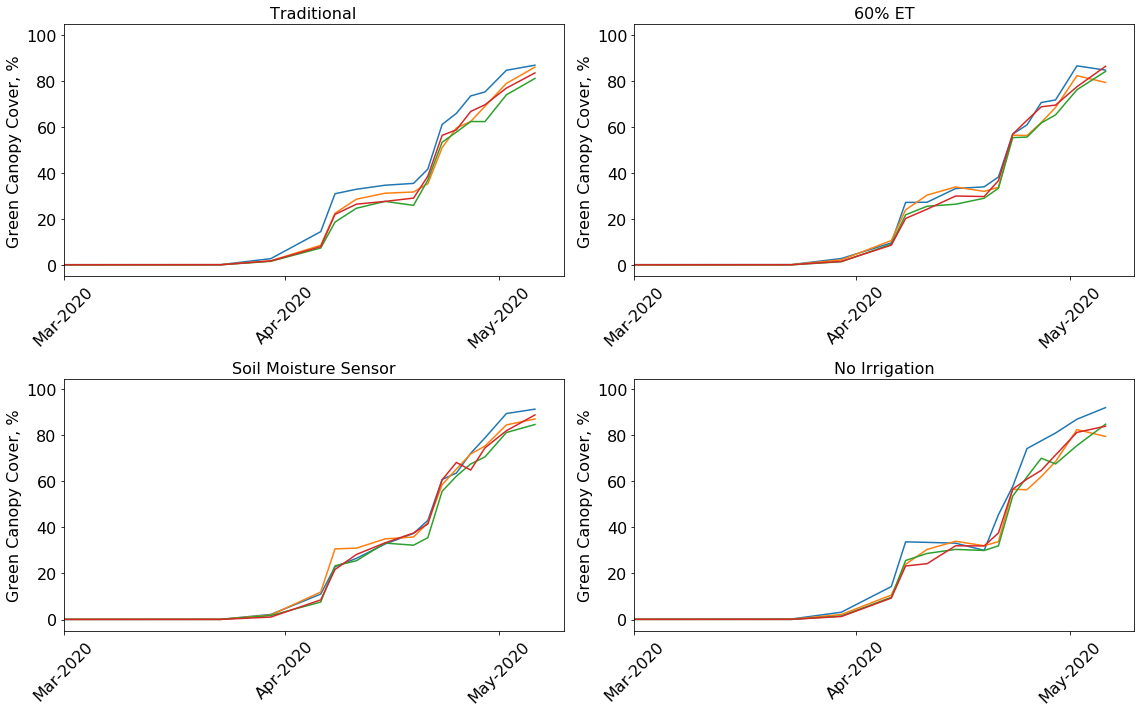

In [36]:
#observe green-up spring 2020

plt.figure(figsize=(16,10))

# Plot observation "Traditional"
plt.subplot(2,2,1)
plt.title('Traditional', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_c"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_h"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_j"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_m"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-10'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.tight_layout()

plt.subplot(2,2,2)
plt.title('60% ET', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_d"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_g"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_i"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_n"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-10'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('Soil Moisture Sensor', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_b"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_e"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_k"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_p"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-10'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('No Irrigation', size=16)
plt.plot(gcc["TIMESTAMP"], gcc["plot_a"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_f"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_l"])
plt.plot(gcc["TIMESTAMP"], gcc["plot_o"])
plt.ylabel('Green Canopy Cover, %', size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-10'))
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.tight_layout()

 
plt.show()

## **Weather Data:** Source Kansas Mesonet | Rocky Ford Station

In [6]:
#stn = 'Rocky Ford';
#interval = 'hour'; # Options: day, hour, 5min;
#start_time = '20190601000000';
#end_time =   '20190615000000';

#root = 'http://mesonet.k-state.edu/rest/stationdata/?'
#url = root + 'stn=' + stn + '&int=' + interval + '&t_start=' + start_time + '&t_end=' + end_time;
#print(url) # not working

# url works 
url_2 = ('http://mesonet.k-state.edu/rest/stationdata?stn=Rocky%20Ford&int=hour&t_start=20190601000000&t_end=20191001000000')
print(url_2)

http://mesonet.k-state.edu/rest/stationdata?stn=Rocky%20Ford&int=hour&t_start=20190601000000&t_end=20191001000000


In [7]:
weather = pd.read_csv(url_2)

weather['TIMESTAMP'] = pd.to_datetime(weather["TIMESTAMP"], format='%Y-%m-%d %H:%M:%S')

In [8]:
weather.head()

,TIMESTAMP,STATION,PRESSUREAVG,SLPAVG,TEMP2MAVG,RELHUM2MAVG,VPDEFAVG,PRECIP,SRAVG,SR,...,SOILKA20CM,SOILKA50CM,SOILPA5CM,SOILPA10CM,SOILPA20CM,SOILPA50CM,SOILVR5CM,SOILVR10CM,SOILVR20CM,SOILVR50CM
0,2019-06-01 00:00:00,Rocky Ford,97.55,101.20,15.61,96.60,0.06,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-01 01:00:00,Rocky Ford,97.52,101.17,15.10,97.41,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-01 02:00:00,Rocky Ford,97.49,101.15,14.69,98.11,0.03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-01 03:00:00,Rocky Ford,97.48,101.15,14.31,98.41,0.03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-01 04:00:00,Rocky Ford,97.45,101.14,13.84,98.58,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


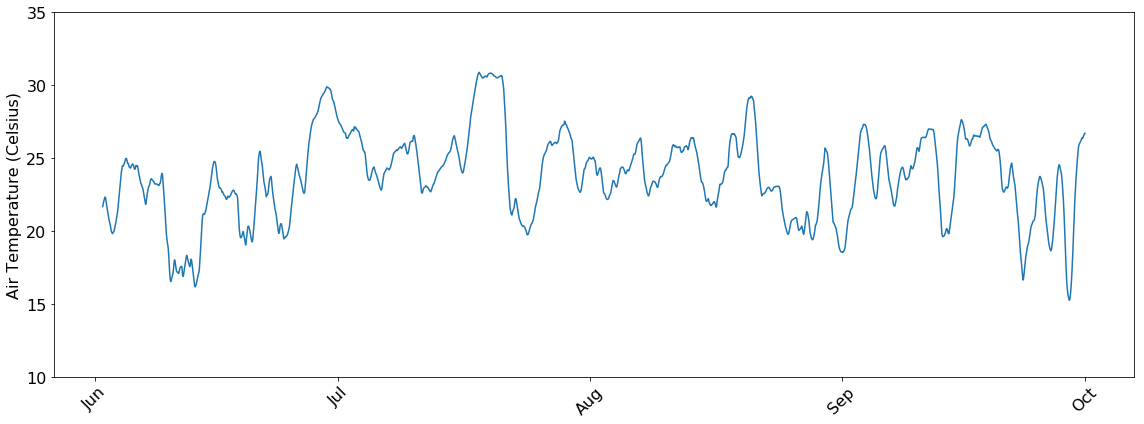

In [41]:
plt.figure(figsize=(16,6))
plt.subplot()
plt.plot(weather["TIMESTAMP"], weather["TEMP2MAVG"].rolling(24).mean())
plt.ylabel('Air Temperature (Celsius)',size=16)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(10,35)
# Make ticks on occurrences of each month:
plt.subplot().xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()

In [10]:
 
e_sat = 0.611 * np.exp((17.502*weather["TEMP2MAVG"])/(weather["TEMP2MAVG"]+ 240.97)) # kPa
e_act = e_sat * weather['RELHUM2MAVG']/100 # kPa
weather['VPD'] = e_sat - e_act

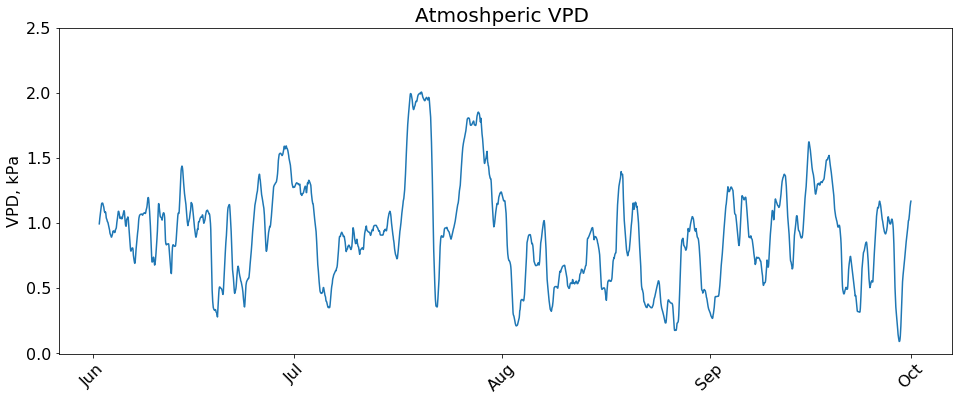

In [15]:

plt.figure(figsize=(16,6))
plt.plot(weather["TIMESTAMP"], weather["VPD"].rolling(24).mean())
plt.ylabel('VPD, kPa', fontsize = 16)
plt.yticks(np.arange(0, 2.6, step=0.5), fontsize =16)
plt.xticks(rotation = 45, fontsize= 16)
plt.title('Atmoshperic VPD ', size=20)
# Make ticks on occurrences of each month:
plt.subplot().xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

In [12]:

idx_data_weather = weather.set_index('TIMESTAMP')

#dataframe between time 10:00 and 16:00
weather_avg = idx_data_weather.between_time('10:00:00', '16:00:00').resample('1D').mean()
weather_avg = weather_avg.reset_index(0)

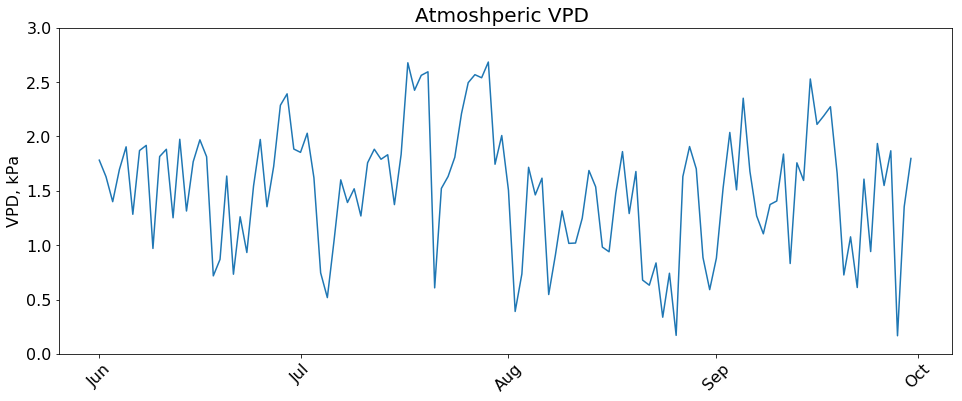

In [14]:
#daily VPD average between 10:00 and 16:00
plt.figure(figsize=(16,6))
plt.plot(weather_avg["TIMESTAMP"], weather_avg["VPD"])
plt.ylabel('VPD, kPa', fontsize =16)
plt.yticks(np.arange(0, 3.1, step=0.5), fontsize =16)
plt.xticks(rotation = 45, fontsize =16)
plt.title('Atmoshperic VPD ', size=20)
plt.ylim(0,3)

# Make ticks on occurrences of each month:
plt.subplot().xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

# **Water Amounts**

In [66]:
print(glob.os.getcwd())
fm = pd.read_excel(r'..\Data\flow_meter.xlsx')
fm.head()

C:\Users\Dyer\Dropbox\Wes Dyer\USGA_zoysia_research\python_code


,plot_id,date,flow_meter (us_gal)
0,A,2019-06-15,3318.4
1,B,2019-06-15,3475.7
2,C,2019-06-15,3576.2
3,D,2019-06-15,3071.8
4,E,2019-06-15,3453.6


In [83]:
#index plot_id
plots = fm.set_index('plot_id')

#Plot A
row_a = plots.loc['A']
row_a['gallons'] = row_a['flow_meter (us_gal)'] - row_a.iloc[0,1]
row_a['mm'] = ((row_a['flow_meter (us_gal)'] - row_a.iloc[0,1]) * 231) / 129600 * 25.4

#Plot B
row_b = plots.loc['B']
row_b['gallons'] = row_b['flow_meter (us_gal)'] - row_b.iloc[0,1]
row_b['mm'] = ((row_b['flow_meter (us_gal)'] - row_b.iloc[0,1]) * 231) / 129600 * 25.4

#Plot C
row_c = plots.loc['C']
row_c['gallons'] = row_c['flow_meter (us_gal)'] - row_c.iloc[0,1]
row_c['mm'] = ((row_c['flow_meter (us_gal)'] - row_c.iloc[0,1]) * 231) / 129600 * 25.4

#Plot D
row_d = plots.loc['D']
row_d['gallons'] = row_d['flow_meter (us_gal)'] - row_d.iloc[0,1]
row_d['mm'] = ((row_d['flow_meter (us_gal)'] - row_d.iloc[0,1]) * 231) / 129600 * 25.4

#Plot E
row_e = plots.loc['E']
row_e['gallons'] = row_e['flow_meter (us_gal)'] - row_e.iloc[0,1]
row_e['mm'] = ((row_e['flow_meter (us_gal)'] - row_e.iloc[0,1]) * 231) / 129600 * 25.4

#Plot F
row_f = plots.loc['F']
row_f['gallons'] = row_f['flow_meter (us_gal)'] - row_f.iloc[0,1]
row_f['mm'] = ((row_f['flow_meter (us_gal)'] - row_f.iloc[0,1]) * 231) / 129600 * 25.4

#Plot G
row_g = plots.loc['G']
row_g['gallons'] = row_g['flow_meter (us_gal)'] - row_g.iloc[0,1]
row_g['mm'] = ((row_g['flow_meter (us_gal)'] - row_g.iloc[0,1]) * 231) / 129600 * 25.4

#Plot H
row_h = plots.loc['H']
row_h['gallons'] = row_h['flow_meter (us_gal)'] - row_h.iloc[0,1]
row_h['mm'] = ((row_h['flow_meter (us_gal)'] - row_h.iloc[0,1]) * 231) / 129600 * 25.4

#Plot I 
row_i = plots.loc['I']
row_i['gallons'] = row_i['flow_meter (us_gal)'] - row_i.iloc[0,1]
row_i['mm'] = ((row_i['flow_meter (us_gal)'] - row_i.iloc[0,1]) * 231) / 129600 * 25.4

#Plot J
row_j = plots.loc['J']
row_j['gallons'] = row_j['flow_meter (us_gal)'] - row_j.iloc[0,1]
row_j['mm'] = ((row_j['flow_meter (us_gal)'] - row_j.iloc[0,1]) * 231) / 129600 * 25.4

#Plot K
row_k = plots.loc['K']
row_k['gallons'] = row_k['flow_meter (us_gal)'] - row_k.iloc[0,1]
row_k['mm'] = ((row_k['flow_meter (us_gal)'] - row_k.iloc[0,1]) * 231) / 129600 * 25.4

#Plot L 
row_l = plots.loc['L']
row_l['gallons'] = row_l['flow_meter (us_gal)'] - row_l.iloc[0,1]
row_l['mm'] = ((row_l['flow_meter (us_gal)'] - row_l.iloc[0,1]) * 231) / 129600 * 25.4

#Plot M 
row_m = plots.loc['M']
row_m['gallons'] = row_m['flow_meter (us_gal)'] - row_m.iloc[0,1]
row_m['mm'] = ((row_m['flow_meter (us_gal)'] - row_m.iloc[0,1]) * 231) / 129600 * 25.4

#Plot N
row_n = plots.loc['M']
row_n['gallons'] = row_n['flow_meter (us_gal)'] - row_n.iloc[0,1]
row_n['mm'] = ((row_n['flow_meter (us_gal)'] - row_n.iloc[0,1]) * 231) / 129600 * 25.4

#Plot O
row_o = plots.loc['O']
row_o['gallons'] = row_o['flow_meter (us_gal)'] - row_o.iloc[0,1]
row_o['mm'] = ((row_o['flow_meter (us_gal)'] - row_o.iloc[0,1]) * 231) / 129600 * 25.4

#Plot P 
row_p = plots.loc['P']
row_p['gallons'] = row_p['flow_meter (us_gal)'] - row_p.iloc[0,1]
row_p['mm'] = ((row_p['flow_meter (us_gal)'] - row_p.iloc[0,1]) * 231) / 129600 * 25.4


print(row_a['gallons'].tail(1))
print(row_b['gallons'].tail(1))
print(row_c['gallons'].tail(1))
print(row_d['gallons'].tail(1))
print(row_e['gallons'].tail(1))
print(row_f['gallons'].tail(1))
print(row_g['gallons'].tail(1))
print(row_h['gallons'].tail(1))
print(row_i['gallons'].tail(1))
print(row_j['gallons'].tail(1))
print(row_k['gallons'].tail(1))
print(row_l['gallons'].tail(1))
print(row_m['gallons'].tail(1))
print(row_n['gallons'].tail(1))
print(row_o['gallons'].tail(1))
print(row_p['gallons'].tail(1))


print(row_a['mm'].tail(1))
print(row_b['mm'].tail(1))
print(row_c['mm'].tail(1))
print(row_d['mm'].tail(1))
print(row_e['mm'].tail(1))
print(row_f['mm'].tail(1))
print(row_g['mm'].tail(1))
print(row_h['mm'].tail(1))
print(row_i['mm'].tail(1))
print(row_j['mm'].tail(1))
print(row_k['mm'].tail(1))
print(row_l['mm'].tail(1))
print(row_m['mm'].tail(1))
print(row_n['mm'].tail(1))
print(row_o['mm'].tail(1))
print(row_p['mm'].tail(1))



plot_id
A    0.0
Name: gallons, dtype: float64
plot_id
B    1279.2
Name: gallons, dtype: float64
plot_id
C    4132.0
Name: gallons, dtype: float64
plot_id
D    2631.2
Name: gallons, dtype: float64
plot_id
E    825.6
Name: gallons, dtype: float64
plot_id
F    0.0
Name: gallons, dtype: float64
plot_id
G    2581.0
Name: gallons, dtype: float64
plot_id
H    3565.1
Name: gallons, dtype: float64
plot_id
I    2465.8
Name: gallons, dtype: float64
plot_id
J    2580.4
Name: gallons, dtype: float64
plot_id
K    1139.9
Name: gallons, dtype: float64
plot_id
L    0.0
Name: gallons, dtype: float64
plot_id
M    3541.7
Name: gallons, dtype: float64
plot_id
M    3541.7
Name: gallons, dtype: float64
plot_id
O    0.0
Name: gallons, dtype: float64
plot_id
P    1017.9
Name: gallons, dtype: float64
plot_id
A    0.0
Name: mm, dtype: float64
plot_id
B    57.913411
Name: mm, dtype: float64
plot_id
C    187.068648
Name: mm, dtype: float64
plot_id
D    119.122707
Name: mm, dtype: float64
plot_id
E    37.377511
Na

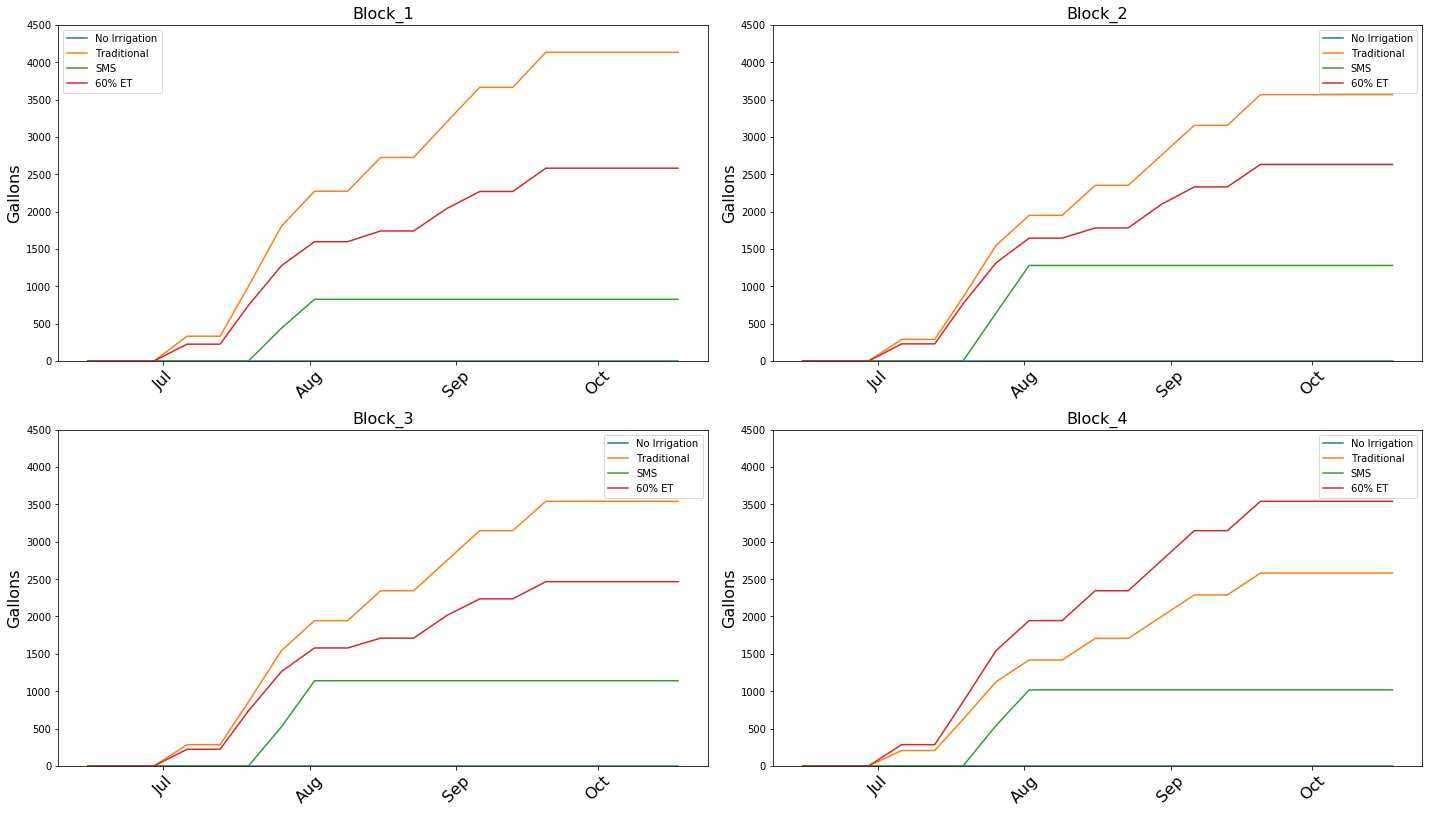

In [89]:
#comparing water amounts by blocks 
# plots: A, C, E, G 
#row_p['date'] = pd.to_datetime(row_p["date"], format='%Y-%m-%d')
plt.figure(figsize=(20,12))

plt.title('Block_1', size=16)
plt.subplot(2,2,1)
plt.title('Block_1', size=16)
plt.plot(row_a["date"], row_a["gallons"], label = 'No Irrigation')
plt.plot(row_c["date"], row_c["gallons"], label = 'Traditional')
plt.plot(row_e["date"], row_e["gallons"], label = 'SMS')
plt.plot(row_g["date"], row_g["gallons"], label = '60% ET')
plt.ylabel('Gallons', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,4500)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.subplot(2,2,2)
plt.title('Block_2', size=16)
plt.plot(row_f["date"], row_f["gallons"], label = 'No Irrigation')
plt.plot(row_h["date"], row_h["gallons"], label = 'Traditional')
plt.plot(row_b["date"], row_b["gallons"], label = 'SMS')
plt.plot(row_d["date"], row_d["gallons"], label = '60% ET')
plt.ylabel('Gallons', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,4500)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.subplot(2,2,3)
plt.title('Block_3', size=16)
plt.plot(row_o["date"], row_o["gallons"], label = 'No Irrigation')
plt.plot(row_m["date"], row_m["gallons"], label = 'Traditional')
plt.plot(row_k["date"], row_k["gallons"], label = 'SMS')
plt.plot(row_i["date"], row_i["gallons"], label = '60% ET')
plt.ylabel('Gallons', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,4500)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.subplot(2,2,4)
plt.title('Block_4', size=16)
plt.plot(row_l["date"], row_l["gallons"], label = 'No Irrigation')
plt.plot(row_j["date"], row_j["gallons"], label = 'Traditional')
plt.plot(row_p["date"], row_p["gallons"], label = 'SMS')
plt.plot(row_n["date"], row_n["gallons"], label = '60% ET')
plt.ylabel('Gallons', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,4500)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.show()



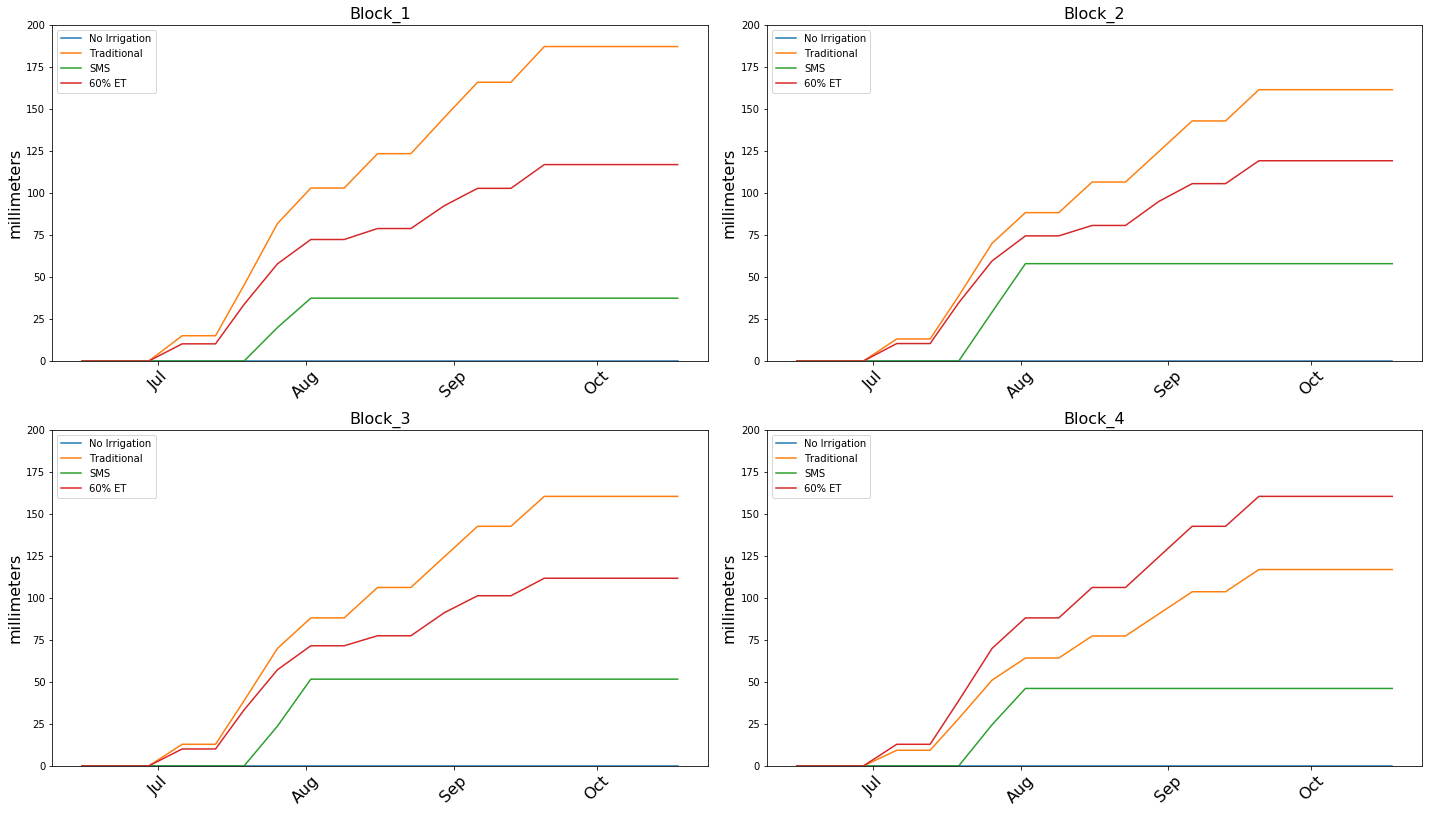

In [99]:
#comparing water amounts by blocks 
# plots: A, C, E, G 
#row_p['date'] = pd.to_datetime(row_p["date"], format='%Y-%m-%d')
plt.figure(figsize=(20,12))

plt.title('Block_1', size=16)
plt.subplot(2,2,1)
plt.title('Block_1', size=16)
plt.plot(row_a["date"], row_a["mm"], label = 'No Irrigation')
plt.plot(row_c["date"], row_c["mm"], label = 'Traditional')
plt.plot(row_e["date"], row_e["mm"], label = 'SMS')
plt.plot(row_g["date"], row_g["mm"], label = '60% ET')
plt.ylabel('millimeters', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,200)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,1).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,1).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()


plt.subplot(2,2,2)
plt.title('Block_2', size=16)
plt.plot(row_f["date"], row_f["mm"], label = 'No Irrigation')
plt.plot(row_h["date"], row_h["mm"], label = 'Traditional')
plt.plot(row_b["date"], row_b["mm"], label = 'SMS')
plt.plot(row_d["date"], row_d["mm"], label = '60% ET')
plt.ylabel('millimeters', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,200)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,2).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,2).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.subplot(2,2,3)
plt.title('Block_3', size=16)
plt.plot(row_o["date"], row_o["mm"], label = 'No Irrigation')
plt.plot(row_m["date"], row_m["mm"], label = 'Traditional')
plt.plot(row_k["date"], row_k["mm"], label = 'SMS')
plt.plot(row_i["date"], row_i["mm"], label = '60% ET')
plt.ylabel('millimeters', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,200)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,3).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,3).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.subplot(2,2,4)
plt.title('Block_4', size=16)
plt.plot(row_l["date"], row_l["mm"], label = 'No Irrigation')
plt.plot(row_j["date"], row_j["mm"], label = 'Traditional')
plt.plot(row_p["date"], row_p["mm"], label = 'SMS')
plt.plot(row_n["date"], row_n["mm"], label = '60% ET')
plt.ylabel('millimeters', size=16)
plt.xticks(rotation = 45, fontsize = 16)
plt.ylim(0,200)
plt.tight_layout()
# Make ticks on occurrences of each month:
plt.subplot(2,2,4).xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
plt.subplot(2,2,4).xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()

plt.show()


In [64]:
#plt.figure(figsize=(14,8))
#plt.plot(row_e["date"], row_c["mm"])
#plt.plot(row_b["date"], row_e["mm"])
#plt.plot(row_c["date"], row_g["mm"])
#plt.xticks(fontsize=16, rotation =45)
#plt.ylabel('millimeters', color='g', size=16)
#plt.yticks(fontsize=16)
#plt.ylim(0,200)

#plt.twinx()
#plt.plot(weather["TIMESTAMP"],weather["PRECIP"])
#plt.yticks(fontsize=16)
#plt.ylabel('mm', color='b', size=16)
#plt.ylim(0,90)

#plt.show()